In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import DBSCAN
from tqdm import tqdm

In [ ]:
# Importing the data
data = pd.read_csv("shot_logs.csv")

In [ ]:
data.shape

(128069, 21)

In [ ]:
data.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [ ]:
# select the columns that you want to use for outlier detection
cols = ['SHOT_NUMBER', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'DRIBBLES']

In [ ]:
# standardizing the data using StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data[cols])

In [ ]:
# applying PCA to visualize the data in 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

In [ ]:
# apply UMAP for better visualization
umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.5)
with tqdm(total=1, desc="Applying UMAP") as pbar:
    data_umap = umap.fit_transform(data_std)
    pbar.update()

Applying UMAP: 100%|██████████████████████████████| 1/1 [01:23<00:00, 83.18s/it]


In [ ]:
# perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
with tqdm(total=1, desc="Performing K-means clustering") as pbar:
    kmeans.fit(data_std)
    pbar.update()

Performing K-means clustering:   0%|                      | 0/1 [00:00<?, ?it/s]/Users/nitheshrajmohan/miniforge3/envs/newv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Performing K-means clustering: 100%|██████████████| 1/1 [00:00<00:00,  2.34it/s]


In [ ]:
# perform Density-based clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
with tqdm(total=1, desc="Performing Density-based clustering") as pbar:
    dbscan.fit(data_std)
    pbar.update()

Performing Density-based clustering: 100%|████████| 1/1 [00:12<00:00, 12.50s/it]


In [ ]:
# perform Local outlier factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
with tqdm(total=1, desc="Performing Local outlier factor") as pbar:
    lof.fit_predict(data_std)
    pbar.update()

Performing Local outlier factor: 100%|████████████| 1/1 [00:01<00:00,  1.05s/it]


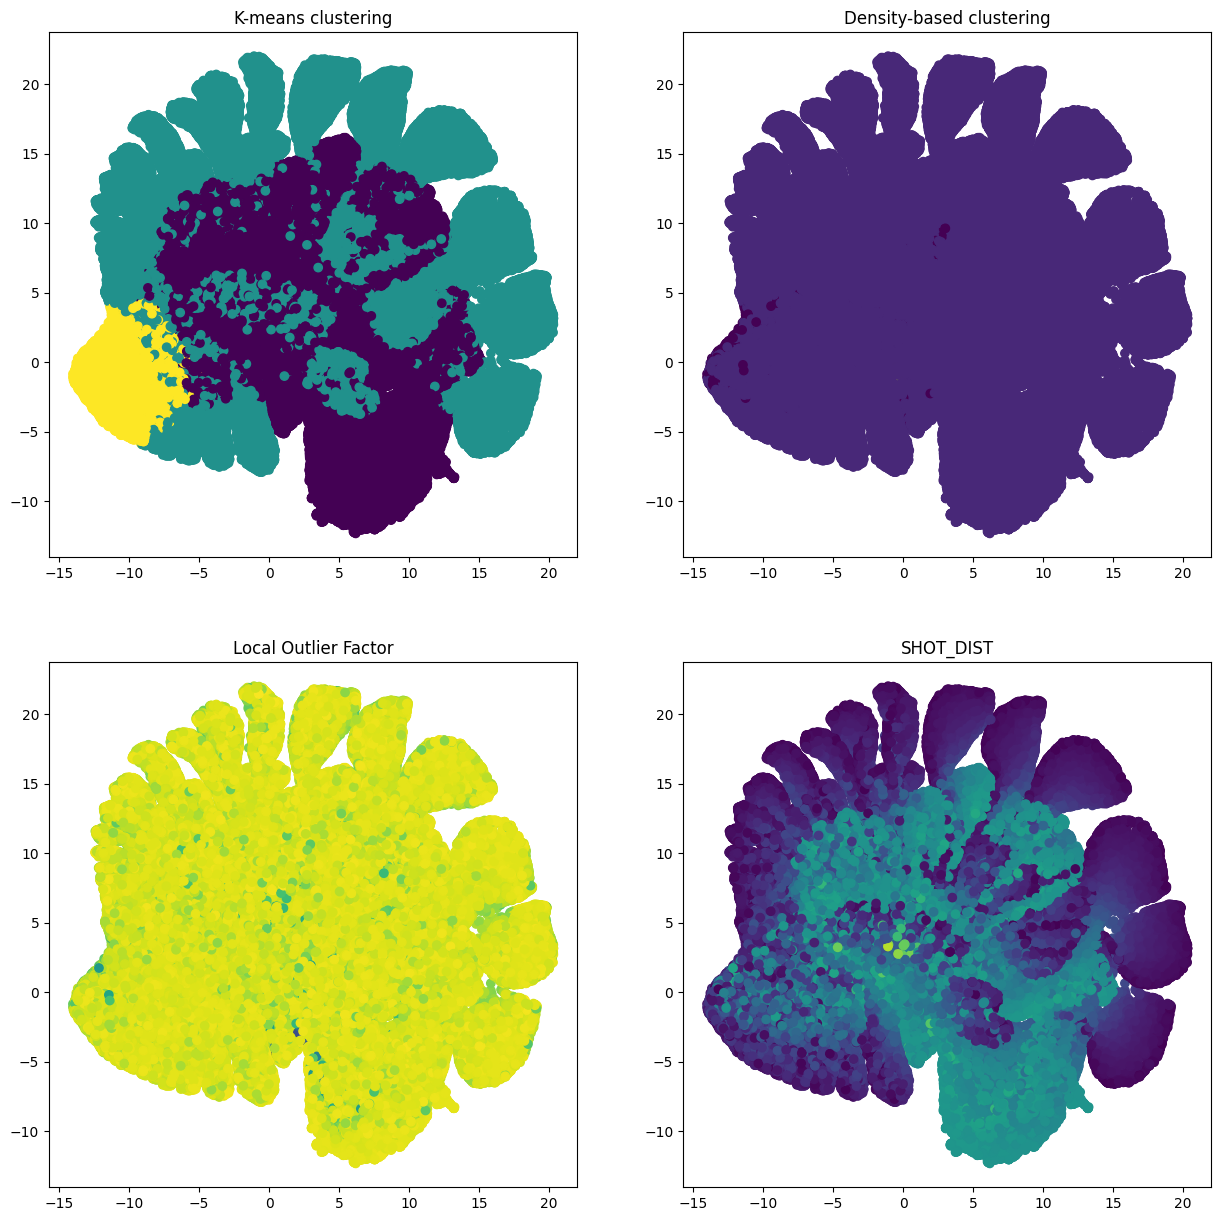

In [ ]:
# plot the data and the results of each algorithm
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].scatter(data_umap[:, 0], data_umap[:, 1], c=kmeans.labels_)
ax[0, 0].set_title('K-means clustering')

ax[0, 1].scatter(data_umap[:, 0], data_umap[:, 1], c=dbscan.labels_)
ax[0, 1].set_title('Density-based clustering')

ax[1, 0].scatter(data_umap[:, 0], data_umap[:, 1], c=lof.negative_outlier_factor_)
ax[1, 0].set_title('Local Outlier Factor')

ax[1, 1].scatter(data_umap[:, 0], data_umap[:, 1], c=data['SHOT_DIST'])
ax[1, 1].set_title('SHOT_DIST')

plt.show()